<a id=top-page></a>
# Inspect convergence of the MSE loss

***

In [1]:
%run -i imports.py
%matplotlib inline

In [2]:
n_components = 2

In [3]:
data_tag = 'H2-air'
# data_tag = 'CH4-air'
# data_tag = 'C2H4-air'

In [4]:
MSE_loss_directory = '../results-MSE-loss/'

In [5]:
########################################################################
## Load data - Hydrogen/air flamelet
########################################################################

if data_tag == 'H2-air':
    
    state_space = pd.read_csv('../data/' + data_tag + '-state-space.csv', sep = ',', header=None).to_numpy()[:,0:-2]
    state_space_sources = pd.read_csv('../data/' + data_tag + '-state-space-sources.csv', sep = ',', header=None).to_numpy()[:,0:-2]
    state_space_names = pd.read_csv('../data/' + data_tag + '-state-space-names.csv', sep = ',', header=None).to_numpy().ravel()[0:-2]

    selected_state_variables = [0, 2, 4, 5, 6, 8]

########################################################################
## Load data - Syngas/air flamelet
########################################################################

if data_tag == 'CO-H2-air':
    
    state_space = pd.read_csv('../data/' + data_tag + '-state-space.csv', sep = ',', header=None).to_numpy()[:,0:-1]
    state_space_sources = pd.read_csv('../data/' + data_tag + '-state-space-sources.csv', sep = ',', header=None).to_numpy()[:,0:-1]
    state_space_names = pd.read_csv('../data/' + data_tag + '-state-space-names.csv', sep = ',', header=None).to_numpy().ravel()[0:-1]

    (n_observations, n_variables) = np.shape(state_space)

    print('\nThe data set has ' + str(n_observations) + ' observations.')
    print('\nThe data set has ' + str(n_variables) + ' variables.')

    selected_state_variables = [0, 1, 2, 4, 5, 8, 9]

########################################################################
## Load data - Methane/air flamelet
########################################################################

if data_tag == 'CH4-air':
   
    state_space = pd.read_csv('../data/' + data_tag + '-state-space.csv', sep = ',', header=None).to_numpy()[:,0:-1]
    state_space_sources = pd.read_csv('../data/' + data_tag + '-state-space-sources.csv', sep = ',', header=None).to_numpy()[:,0:-1]
    state_space_names = pd.read_csv('../data/' + data_tag + '-state-space-names.csv', sep = ',', header=None).to_numpy().ravel()[0:-1]

    species_to_remove = 'N2'
    (species_index, ) = np.where(state_space_names==species_to_remove)
    state_space = np.delete(state_space, np.s_[species_index], axis=1)
    state_space_sources = np.delete(state_space_sources, np.s_[species_index], axis=1)
    state_space_names = np.delete(state_space_names, np.s_[species_index])

    selected_state_variables = [0, 4, 5, 6, 14, 16]

########################################################################
## Load data - Ethylene/air flamelet
########################################################################

if data_tag == 'C2H4-air':
   
    state_space = pd.read_csv('../data/' + data_tag + '-state-space.csv', sep = ',', header=None).to_numpy()[:,0:-1]
    state_space_sources = pd.read_csv('../data/' + data_tag + '-state-space-sources.csv', sep = ',', header=None).to_numpy()[:,0:-1]
    state_space_names = pd.read_csv('../data/' + data_tag + '-state-space-names.csv', sep = ',', header=None).to_numpy().ravel()[0:-1]

    selected_state_variables = [0, 4, 5, 6, 15, 22]

(n_observations, n_variables) = np.shape(state_space)

print('\nThe data set has ' + str(n_observations) + ' observations.')
print('\nThe data set has ' + str(n_variables) + ' variables.')

state_space_names[selected_state_variables]


The data set has 58101 observations.

The data set has 9 variables.


array(['T', 'H2', 'OH', 'H2O', 'O2', 'H2O2'], dtype=object)

In [6]:
random_seeds_list = [i for i in range(20,40)]
if n_components == 2: decoder_architecture = (6,9,10)
if n_components == 3: decoder_architecture = (7,10,11)
learning_rate = 0.001
batch_size = n_observations
n_epochs = 20000
case_name = str(n_components) + 'D-LDM-lr-' + str(learning_rate) + '-bs-' + str(batch_size) + '-n-epochs-' + str(n_epochs) + '-architecture'
print(case_name)

2D-LDM-lr-0.001-bs-58101-n-epochs-20000-architecture


In [7]:
architecture_without = str(n_variables) + '-' + str(n_components) + '-' + '-'.join([str(i) for i in decoder_architecture]) + '-' + str(len(selected_state_variables))
architecture_with = str(n_variables) + '-' + str(n_components) + '-' + '-'.join([str(i) for i in decoder_architecture]) + '-' + str(len(selected_state_variables) + n_components*2)

In [8]:
architecture_with

'9-2-6-9-10-10'

***

## Visualize the results

In [9]:
MSE_losses_without = np.zeros((n_epochs, len(random_seeds_list)))
MSE_losses_with = np.zeros((n_epochs, len(random_seeds_list)))

for i, random_seed in enumerate(random_seeds_list):

    # Not including projection-dependent QoIs: - - - - - - - - - - - - - - - - - - - - - - - - - -

    filename = MSE_loss_directory + 'QoIAwareProjection-MSE-training-losses-without-Seta-' + data_tag + '-SLF-' + case_name + '-' + architecture_without + '-random-seed-' + str(random_seed) + '.csv'
    
    MSE_loss_without = pd.read_csv(filename, sep = ',', header=None).to_numpy().ravel()

    MSE_losses_without[:,i] = MSE_loss_without

    # Including projection-dependent QoIs: - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    
    filename = MSE_loss_directory + 'QoIAwareProjection-MSE-training-losses-with-Seta-' + data_tag + '-SLF-' + case_name + '-' + architecture_with + '-random-seed-' + str(random_seed) + '.csv'
    
    MSE_loss_with = pd.read_csv(filename, sep = ',', header=None).to_numpy().ravel()

    MSE_losses_with[:,i] = MSE_loss_with

***

## Visualize the MSE losses

In [10]:
n_epochs_list = [i for i in range(0,n_epochs)]

Text(0.5, 0, 'Epoch')

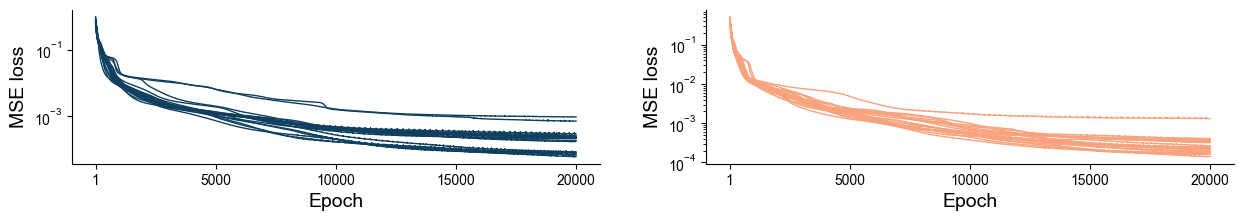

In [11]:
fig = plt.figure(figsize=(15,2))
spec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=[1,1], height_ratios=[1])

lw = 1
fontsize = 14

color_map_colors = cmc.batlow
cluster_colors = color_map_colors(np.linspace(0, 1, 10))

figure = fig.add_subplot(spec[0,0])
for i, random_seed in enumerate(random_seeds_list):
    plt.plot(n_epochs_list, MSE_losses_without[:,i], lw=lw, c=cluster_colors[1])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks([1,5000,10000,15000,20000], **csfont)
plt.yscale('log')
plt.yticks(**csfont)
plt.ylabel('MSE loss', fontsize=fontsize, **csfont)
plt.xlabel('Epoch', fontsize=fontsize, **csfont)

figure = fig.add_subplot(spec[0,1])
for i, random_seed in enumerate(random_seeds_list):
    plt.plot(n_epochs_list, MSE_losses_with[:,i], lw=lw, c=cluster_colors[7])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks([1,5000,10000,15000,20000], **csfont)
plt.yscale('log')
plt.yticks(**csfont)
plt.ylabel('MSE loss', fontsize=fontsize, **csfont)
plt.xlabel('Epoch', fontsize=fontsize, **csfont)

# plt.savefig(data_tag + '-MSE-losses-' + str(n_components) + 'D-LDM.svg', dpi=200, bbox_inches='tight')

***